<a href="https://www.kaggle.com/code/samithsachidanandan/deploy-ml-model-using-flask-iris-dataset?scriptVersionId=230984758" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


## Import Modules 

In [62]:
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## Loading the Dataset 

In [63]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')

## First 5 rows in the Dataset

In [64]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [65]:
df = df.drop(columns= ['Id'])

## Basic Statistics 

In [40]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
#Display the basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
#Display the shape of the dataset
df.shape

(150, 5)

In [9]:
# Display the unique columns in dataset 
df.columns.unique()

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
# To display no of samples on each class
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

## Preprocessing the Dataset 

In [11]:
#check for the null values 
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Exploratory Data Analysis

#### Histograms

<Axes: >

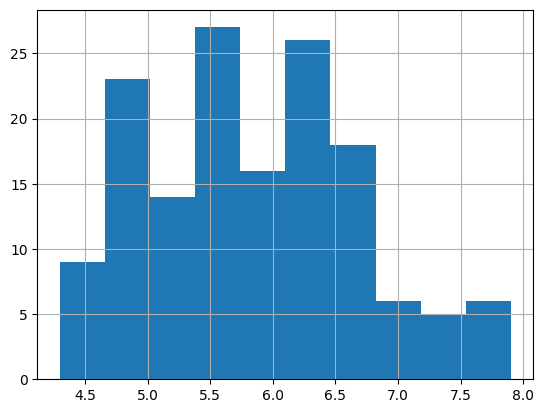

In [12]:
df['SepalLengthCm'].hist()

<Axes: >

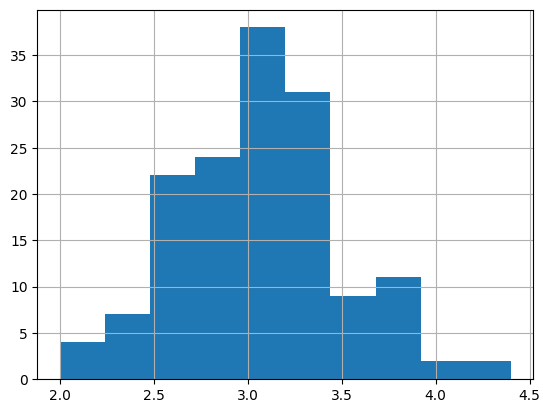

In [13]:
df['SepalWidthCm'].hist()

<Axes: >

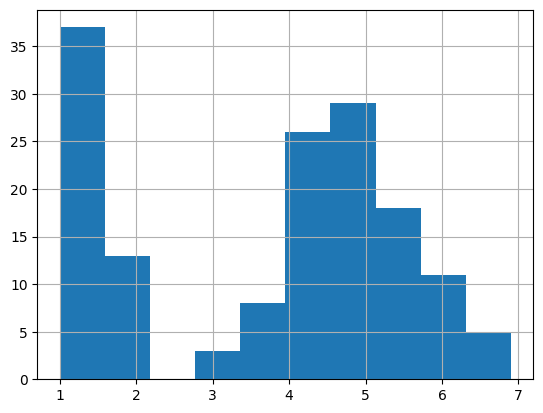

In [14]:
df['PetalLengthCm'].hist()

<Axes: >

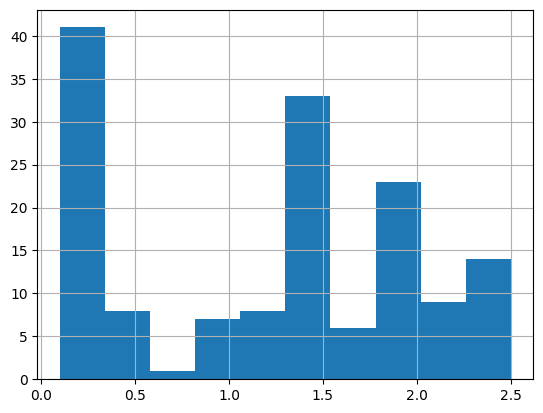

In [15]:
df['PetalWidthCm'].hist()

#### Scatterplot

In [16]:
colors = ['red', 'orange', 'blue']
species = ['Iris-setosa' ,'Iris-versicolor' ,'Iris-virginica']


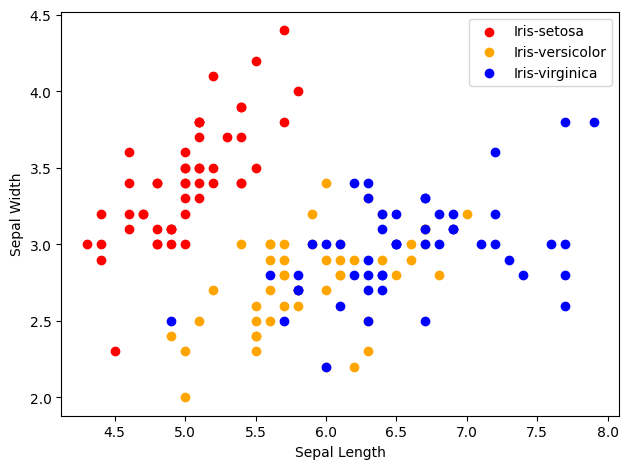

In [17]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'], x ['SepalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.legend()
plt.tight_layout()
plt.show()

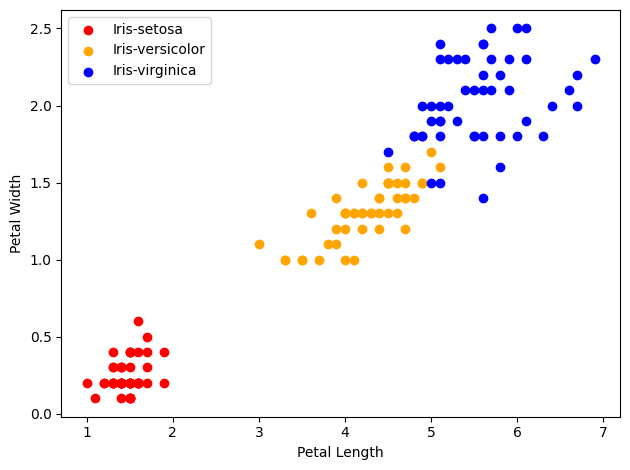

In [18]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['PetalLengthCm'], x ['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.tight_layout()
plt.show()

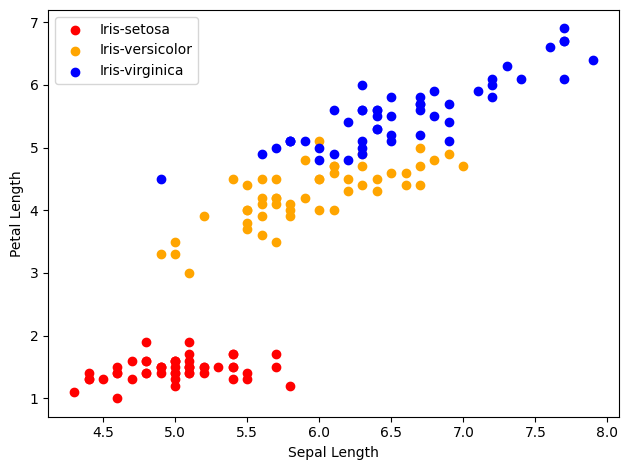

In [19]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['SepalLengthCm'], x ['PetalLengthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.legend()
plt.tight_layout()
plt.show()

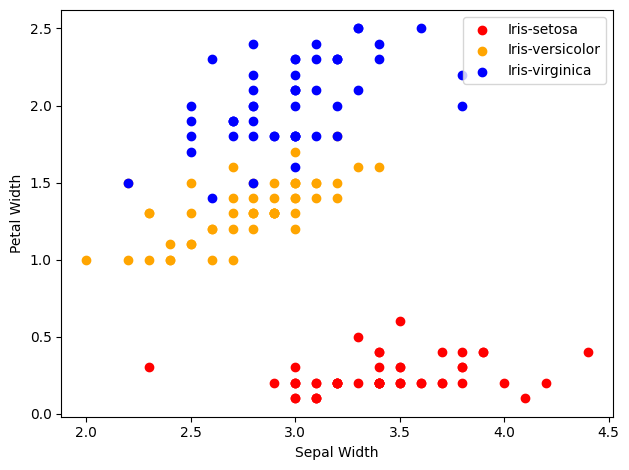

In [20]:
for i in range(3):
    x = df[df['Species']== species[i]]
    plt.scatter(x['SepalWidthCm'], x ['PetalWidthCm'], c = colors[i], label=species[i])
plt.xlabel("Sepal Width")
plt.ylabel("Petal Width")
plt.legend()
plt.tight_layout()
plt.show()

## Correlation Matrix 

#### A correlation matrix is table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables.The value is in the range of -1 to 1. If two variables have high correlation, we can neglect one variable from those two.

In [21]:
df.corr(numeric_only=True)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<Axes: >

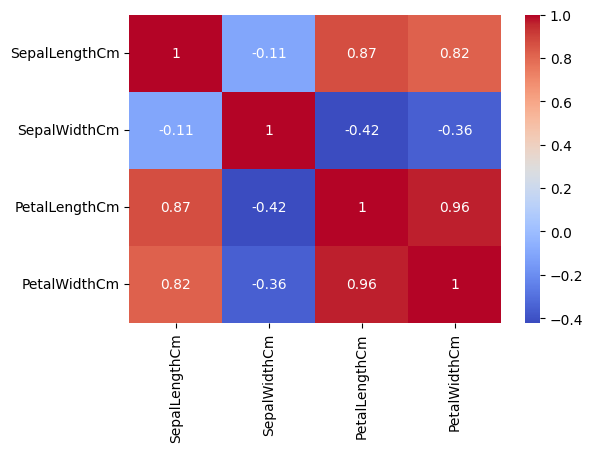

In [22]:
corr = df.corr(numeric_only=True)
fig,ax = plt.subplots(figsize=(6,4))
sns.heatmap(corr, annot=True, ax = ax, cmap = 'coolwarm')

## Label Encoder

### In machine learning, we usually deal with datasets which contains multipl labels in one or moe than one columns. These labels can be in form of words or numbers. Label Enoding refers to converting the labels into numeric form so as to convert it inro the machine-readable form. 

In [45]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [46]:
#df['Species'] = le.fit_transform(df['Species'])
#df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Model Training 

In [66]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Species'])
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30)

In [48]:
# Logistic Regresssion
from sklearn.linear_model import LogisticRegression
logreg  = LogisticRegression()
logreg.fit(X_train,y_train )
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print("Accuracy: ",acc_log)


Accuracy:  97.14


In [49]:
# K-nearest neighbours (KNN)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
acc_knn = round(knn.score(X_train, y_train) * 100, 2)
print("Accuracy: ",acc_knn)

Accuracy:  97.14


In [50]:
#Support vector machines
from sklearn.svm import SVC, LinearSVC
svc = SVC()
svc.fit(X_train, y_train)
acc_svc = round(svc.score(X_train, y_train) * 100, 2)
print("Accuracy: ",acc_svc)

Accuracy:  98.1


In [51]:
#Xgboost
from xgboost import XGBClassifier 
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
acc_xgb = round(xgb.score(X_train, y_train) * 100, 2)
print("Accuracy: ",acc_xgb)


Accuracy:  100.0


In [67]:
# Decision tree 
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
acc_dtree = round(dtree.score(X_train, y_train) * 100, 2)
print("Accuracy: ",acc_dtree)


Accuracy:  100.0


In [68]:
# Save the model
import pickle
filename = 'savemodel.sav'
pickle.dump(dtree,open(filename, 'wb'))

In [69]:
X_test.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
58,6.6,2.9,4.6,1.3
63,6.1,2.9,4.7,1.4
26,5.0,3.4,1.6,0.4
95,5.7,3.0,4.2,1.2
11,4.8,3.4,1.6,0.2


In [70]:
load_model =pickle.load(open(filename, 'rb'))

In [71]:
load_model.predict([[6.0,2.2,4.0,1.0]])

array(['Iris-versicolor'], dtype=object)